# PROJECT NAME: A Threshold Selection Method from Gray-level Histograms

 NAME: kORRA SIVA NAIK
 ROLL NO: 23EE65R04
 SPSD CAPSTONE PROOJECT
 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def calculate_histogram(image):    #Function is defined to calculate the histogram fo the image 
    rows, cols = image.shape
    histogram = np.zeros(256, dtype=int)
    
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
            
    return histogram

In [3]:
def generate_binary_image(image, threshold):    # Here we segment the image pixels into two parts one is 
                                                # back ground second one is foreground based on the threshold values 
    rows, cols = image.shape
    binary_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(rows):
        for j in range(cols):
            binary_image[i, j] = 255 if image[i, j] >= threshold else 0  # threshold value we calculate based on iterative threshold selection
            
    return binary_image

In [4]:
def calculate_within_class_variance(hist, start, end):      # we find mean and variance of the image using the formulas defined here
    total_pixels = sum(hist[start:end])
    weighted_sum = sum(i * hist[i] for i in range(start, end))
    mean = weighted_sum / total_pixels
    
    variance = sum((i - mean)**2 * hist[i] for i in range(start, end)) / total_pixels
    return variance

In [5]:

def calculate_optimal_threshold(hist):                # Our objective is to maximize the within class variance 
    min_within_class_variance = float('inf')       #we iteratively search for the threshold value and finds where we get maximum within class variance 
    optimal_threshold = 0
    
    for threshold in range(1, len(hist)):
        within_class_variance_bg = calculate_within_class_variance(hist, 0, threshold)
        within_class_variance_fg = calculate_within_class_variance(hist, threshold, len(hist))
        
        total_pixels = sum(hist)
        weighted_within_class_variance = (
            (within_class_variance_bg * sum(hist[:threshold]) +
             within_class_variance_fg * sum(hist[threshold:])) / total_pixels
        )
        
        if not math.isnan(weighted_within_class_variance) and weighted_within_class_variance < min_within_class_variance:
            min_within_class_variance = weighted_within_class_variance
            optimal_threshold = threshold
            
    return optimal_threshold

In [8]:
def main():
    image_path = 'gray.png'
    image = Image.open(image_path).convert("L")
    img_array = np.asarray(image)
    
    histogram = calculate_histogram(img_array)
    
    optimal_threshold = calculate_optimal_threshold(histogram)
    print("Optimal Threshold:", optimal_threshold)
    
    binary_result = generate_binary_image(img_array, optimal_threshold)
    
    plt.imshow(binary_result, cmap='gray')
    plt.savefig("otsu_binary.png")
    plt.show()

Optimal Threshold: 114


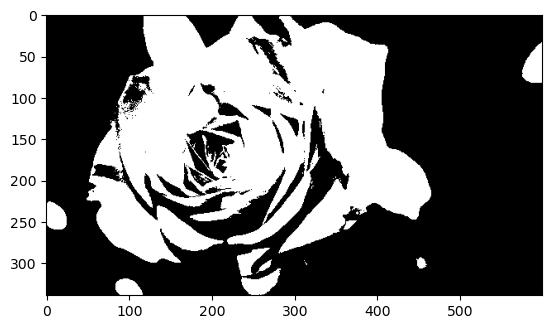

In [9]:
if __name__ == "__main__":
    main()